<a href="https://colab.research.google.com/github/rajni-arora/Question_Answering-Similarity_search/blob/main/04_rouge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ROUGE

**ROUGE** stands for **R**ecall-**O**riented **U**nderstudy for **G**isting **E**valuation. The name is deceptively complicated, because this is not a difficult metric to understand, and it's incredibly easy to implement.

## What is ROUGE

ROUGE is actually a set of metrics, rather than just one. We will cover the main ones that are most likely to be used, starting with ROUGE-N.

### ROUGE-N
ROUGE-N measures the number of matching 'n-grams' between our model predicted answer and a *'reference'*.

An n-gram is simply a grouping of tokens/words. A unigram (1-gram) would consist of a single word. A bigram (2-gram) consists of two consecutive words:

Original: `"the quick brown fox jumps over"`

**Uni**grams: `['the', 'quick', 'brown', 'fox', 'jumps', 'over']`

**Bi**grams: `['the quick', 'quick brown', 'brown fox', 'fox jumps', 'jumps over']`

**Tri**grams: `['the quick brown', 'quick brown fox', 'brown fox jumps', 'fox jumps over']`

The *reference* in our case is our true answer.

With ROUGE-N, the N represents the n-gram that we are using. For ROUGE-1 we would be measuring the match-rate of unigrams between our model output and reference.

ROUGE-2 and ROUGE-3 would use bigrams and trigrams respectively.

Once we have decided which N to use — we now decide on whether we’d like to calculate the ROUGE recall, precision, or F1 score.

### Recall
The recall counts the number of overlapping n-grams found in both the model output and reference — then divides this number by the total number of n-grams in the reference. It looks like this:

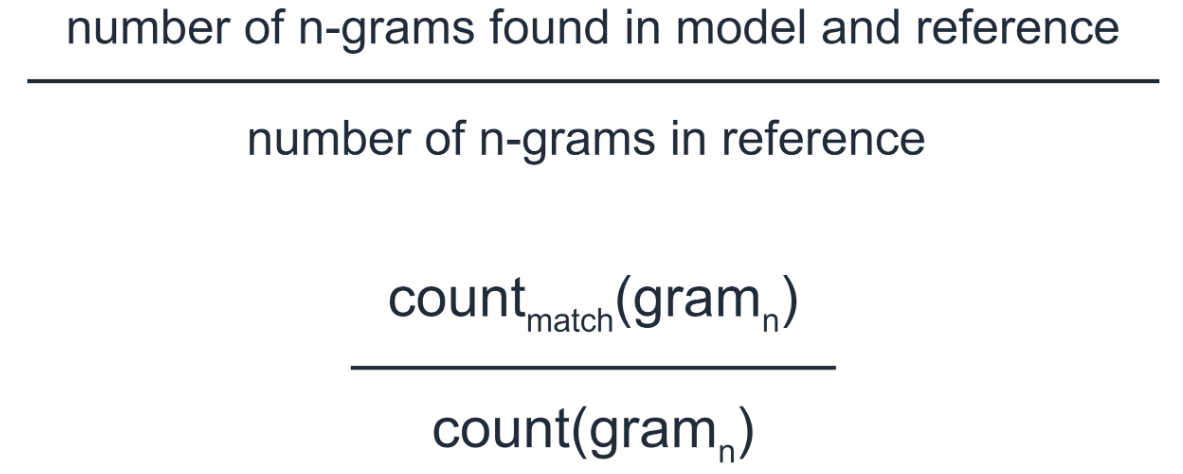![ROUGE-N recall calculation](../../assets/images/rouge_recall.png)

This is great for ensuring our model is **capturing all of the information** contained in the reference — but this isn’t so great at ensuring our model isn’t just pushing out a huge number of words to game the recall score:

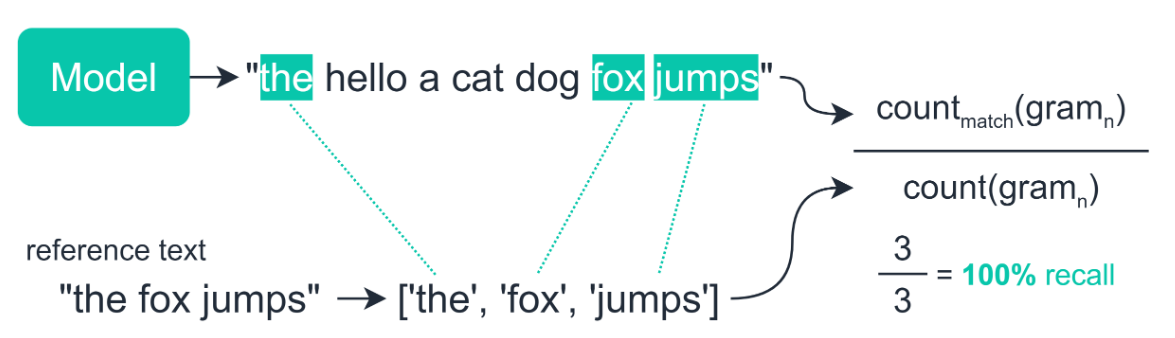
### Precision

To avoid this we use the precision metric — which is calculated in almost the exact same way, but rather than dividing by the reference n-gram count, we divide by the model n-gram count.

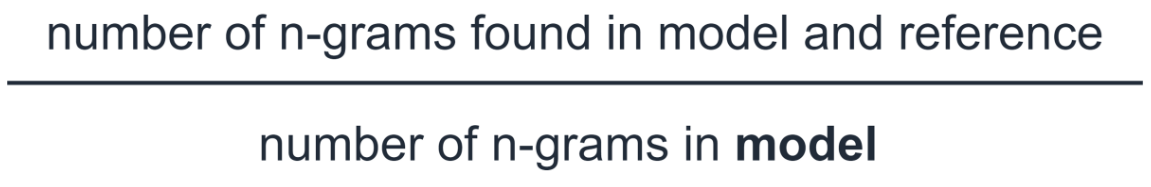

So if we apply this to our previous example, we get a precision score of just 43%:

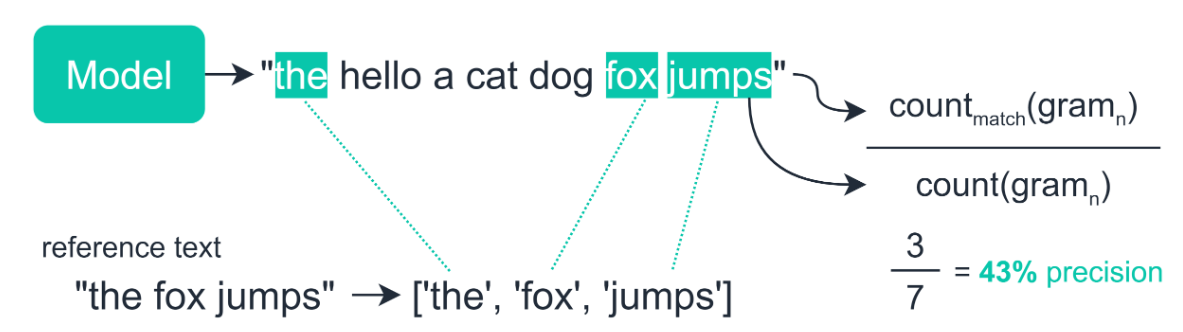

### F1-Score

Now that we both the recall and precision values, we can use them to calculate our ROUGE F1 score like so:

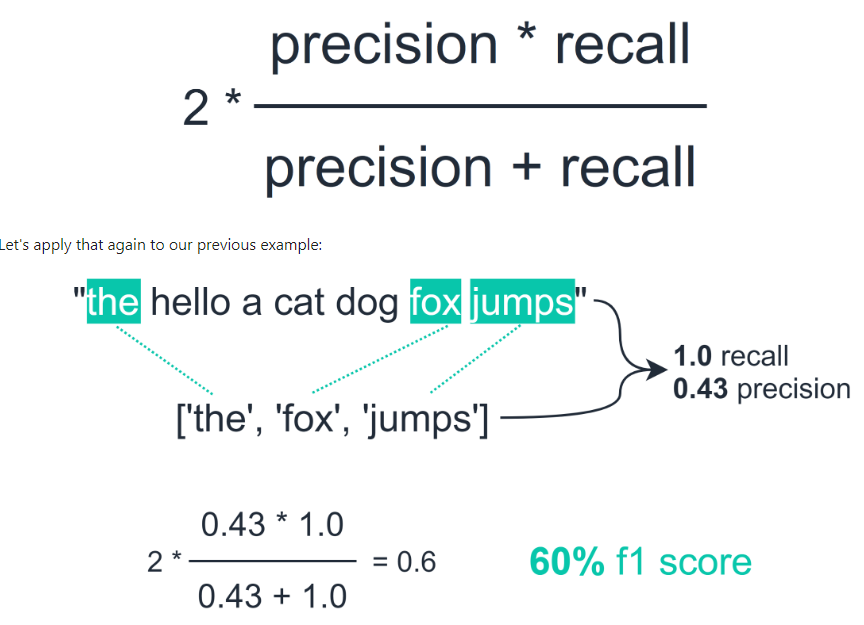

That gives us a reliable measure of our model performance that relies not only on the model capturing as many words as possible (recall) but doing so without outputting irrelevant words (precision).

### ROUGE-L

ROUGE-L measures the **longest common subsequence (LCS)** between our model output and reference. All this means is that we count the longest sequence of tokens that is shared between both:

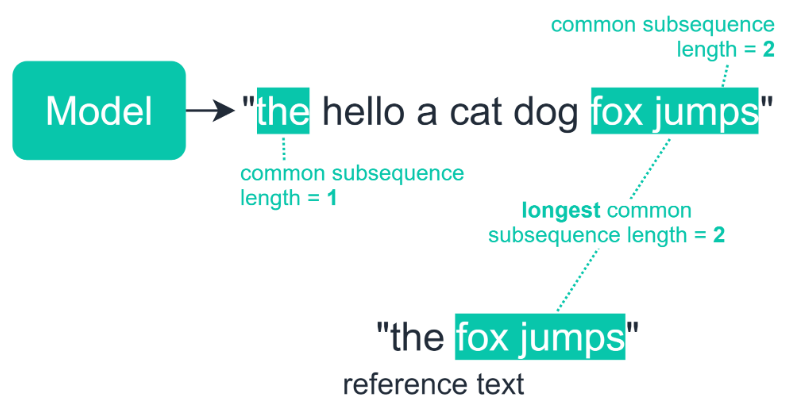

The idea here is that a longer shared sequence would indicate more similarity between the two sequences. We can apply our recall and precision calculations just like before — but this time we replace the match with LCS.

First we calculate the LCS recall:

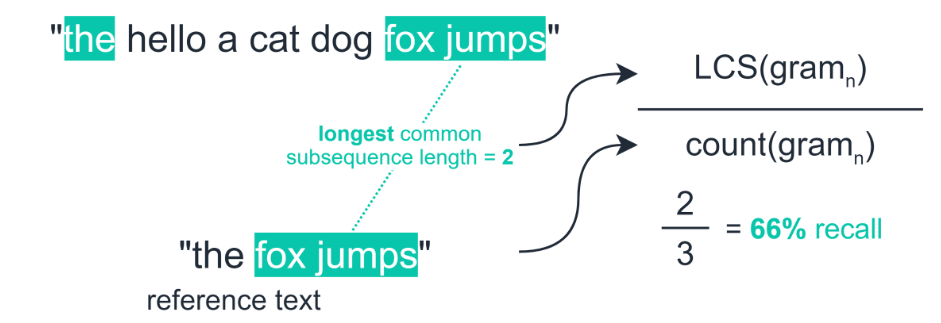

Precision is the same, we just switch our total n-gram count from the reference to the model:

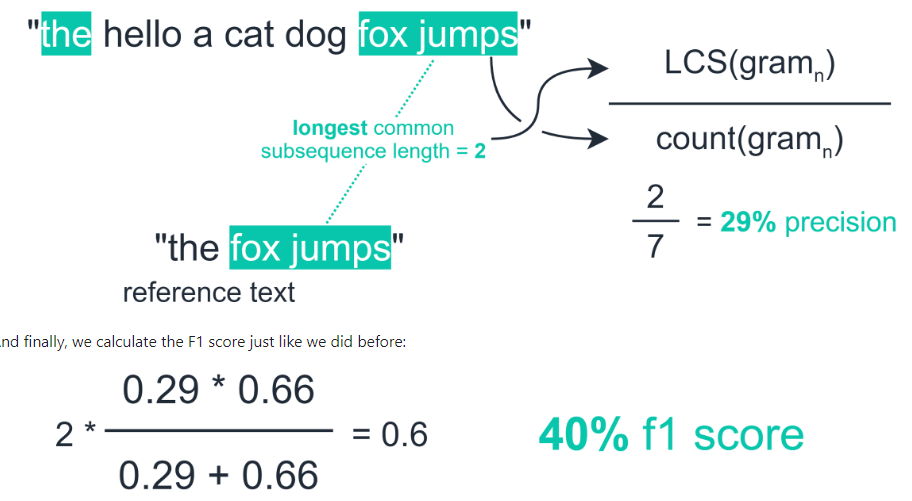


### ROUGE-S

The final ROUGE metric we will look at is the ROUGE-S — or skip-gram concurrence metric.

Now, this metric is much less popular than ROUGE-N and ROUGE-L covered already — but it’s worth being aware of what it does.

Using the skip-gram metric allows us to search for consecutive words from the reference text, that appear in the model output but are separated by one-or-more other words.

So, if we took the bigram “the fox”, our original ROUGE-2 metric would only match this if this exact sequence was found in the model output. If the model instead outputs “the brown fox” — no match would be found.

ROUGE-S allows us to add a degree of leniency to our n-gram matching. For our bigram example we could match by using a skip-bigram measure:

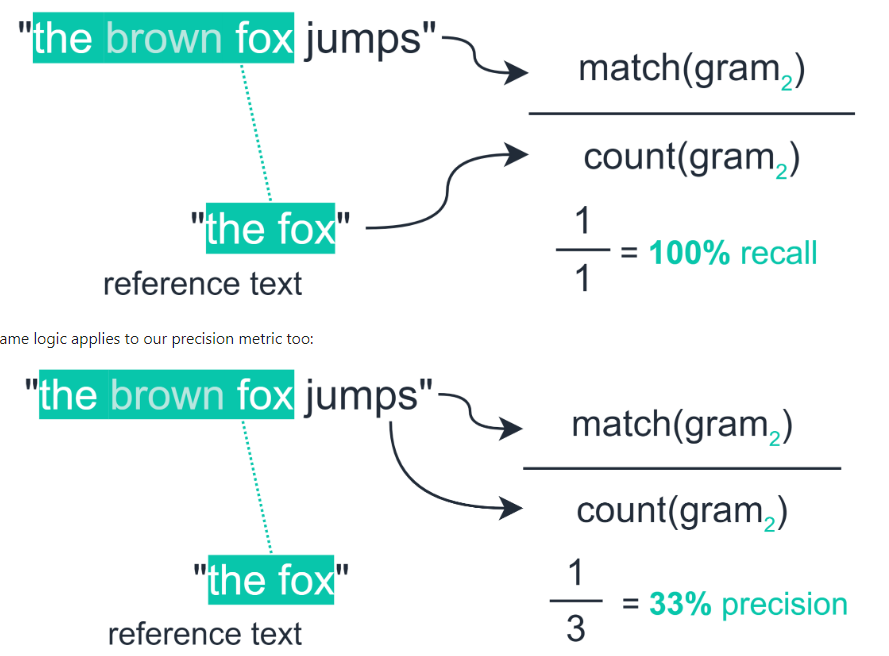

After calculating our recall and precision, we can calculate the F1 score too just as we did before.

### Cons

ROUGE is a great evaluation metric but comes with some drawbacks. In-particular, ROUGE does not cater for different words that have the same meaning — as it measures syntactical matches rather than semantics.

So, if we had two sequences that had the same meaning — but used different words to express that meaning — they could be assigned a low ROUGE score.

This can be offset slightly by using several references and taking the average score, but this will not solve the problem entirely.

Nonetheless, it’s a good metric which is very popular for assessing the performance of several NLP tasks, including machine translation, automatic summarization, and *for us*, question-and-answering.

## In Python

We've worked through the theory of the ROUGE metrics and how they work. Fortunately, implementing these metrics in Python is incredibly easy thanks to the Python rouge library.

We can install the library through pip:

```
pip install rouge
```

And scoring our model output against a reference is as easy as this:

In [ ]:
from rouge import Rouge

model_out = 'hello to the world'
reference = 'hello world'

# initialize the rouge object
rouge = Rouge()

# get the scores
rouge.get_scores(model_out, reference)

[{'rouge-1': {'f': 0.6666666622222223, 'p': 0.5, 'r': 1.0},
  'rouge-2': {'f': 0.0, 'p': 0.0, 'r': 0.0},
  'rouge-l': {'f': 0.6666666622222223, 'p': 0.5, 'r': 1.0}}]

The `get_scores` method returns three metrics, ROUGE-N using a unigram (ROUGE-1) and a bigram (ROUGE-2) — and ROUGE-L.

For each of these, we receive the F1 score **f**, precision **p**, and recall **r**.

Let's apply this to our set of five answers and see what we get. First, we need to define the `answers` list.

In [ ]:
answers = [{'predicted': 'France', 'true': 'France.'},
           {'predicted': 'in the 10th and 11th centuries',
            'true': '10th and 11th centuries'},
           {'predicted': '10th and 11th centuries', 'true': '10th and 11th centuries'},
           {'predicted': 'Denmark, Iceland and Norway',
            'true': 'Denmark, Iceland and Norway'},
           {'predicted': 'Rollo', 'true': 'Rollo,'}]

Then we need to reformat this list into two lists, one for our predictions `model_out` and another for the true answers `reference`:

In [ ]:
model_out = [ans['predicted'] for ans in answers]

reference = [ans['true'] for ans in answers]

In [ ]:
model_out

['France',
 'in the 10th and 11th centuries',
 '10th and 11th centuries',
 'Denmark, Iceland and Norway',
 'Rollo']

Now we can pass both of these lists to the `rouge.get_scores` method to return a list of results:

In [ ]:
rouge.get_scores(model_out, reference)

[{'rouge-1': {'f': 0.999999995, 'p': 1.0, 'r': 1.0},
  'rouge-2': {'f': 0.0, 'p': 0.0, 'r': 0.0},
  'rouge-l': {'f': 0.999999995, 'p': 1.0, 'r': 1.0}},
 {'rouge-1': {'f': 0.7999999952000001, 'p': 0.6666666666666666, 'r': 1.0},
  'rouge-2': {'f': 0.7499999953125, 'p': 0.6, 'r': 1.0},
  'rouge-l': {'f': 0.7999999952000001, 'p': 0.6666666666666666, 'r': 1.0}},
 {'rouge-1': {'f': 0.999999995, 'p': 1.0, 'r': 1.0},
  'rouge-2': {'f': 0.999999995, 'p': 1.0, 'r': 1.0},
  'rouge-l': {'f': 0.999999995, 'p': 1.0, 'r': 1.0}},
 {'rouge-1': {'f': 0.999999995, 'p': 1.0, 'r': 1.0},
  'rouge-2': {'f': 0.999999995, 'p': 1.0, 'r': 1.0},
  'rouge-l': {'f': 0.999999995, 'p': 1.0, 'r': 1.0}},
 {'rouge-1': {'f': 0.0, 'p': 0.0, 'r': 0.0},
  'rouge-2': {'f': 0.0, 'p': 0.0, 'r': 0.0},
  'rouge-l': {'f': 0.0, 'p': 0.0, 'r': 0.0}}]

Ideally, we want to get average metrics for all answers, we can do this by adding `avg=True` to the `get_scores` method.

In [ ]:
rouge.get_scores(model_out, reference, avg=True)

{'rouge-1': {'f': 0.7599999960400001, 'p': 0.7333333333333333, 'r': 0.8},
 'rouge-2': {'f': 0.5499999970625, 'p': 0.52, 'r': 0.6},
 'rouge-l': {'f': 0.7599999960400001, 'p': 0.7333333333333333, 'r': 0.8}}

And that's it, we've explored a few more insightful metrics for measuring our Q&A model performance. Going forwards, we'll be using **ROUGE** a lot, so it's good to get familiar with.